### Normalization
* The goal of normalization is to change the values of numeric columns in the dataset to use a common scale without distorting the differences in the ranges of values or losing info.
* MinMaxScaling - Xi = ( Xi - Xmin ) / ( Xmax - Xmin) - squishing the data in unit dimension . >>>> Use MinMaxScaler() -- image processing
* Mean Normalization -  Xi = ( Xi - Xmean ) / ( Xmax - Xmin)
* Max absolute - Xi = Xi / | Xmax | >>> use MaxAbsScaler - used in sparse data ( data where there are many zeros )
* Robust Scaling - Xi = ( Xi - Xmedian ) / (IQR) - >>>> RobustScaler() ___ if data is robust to outliers . 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('E:/csvfiles/wine_data.csv')

In [7]:
df = df.iloc[:,:3]

In [8]:
df.columns=['Class label' , 'Alcohol' , 'Malic acid']

In [9]:
df.head()

,Class label,Alcohol,Malic acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76


### Let's visualize our data first .

<AxesSubplot: xlabel='Alcohol', ylabel='Density'>

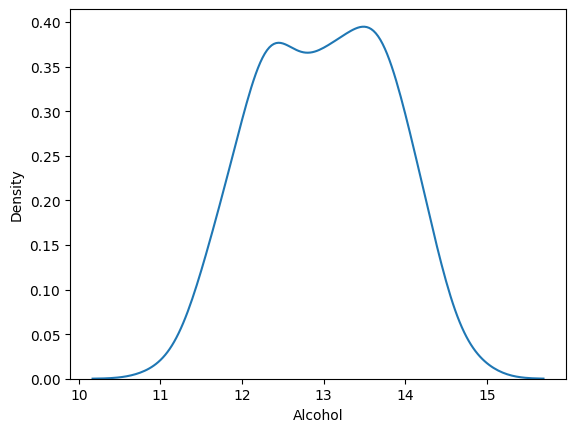

In [10]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot: xlabel='Malic acid', ylabel='Density'>

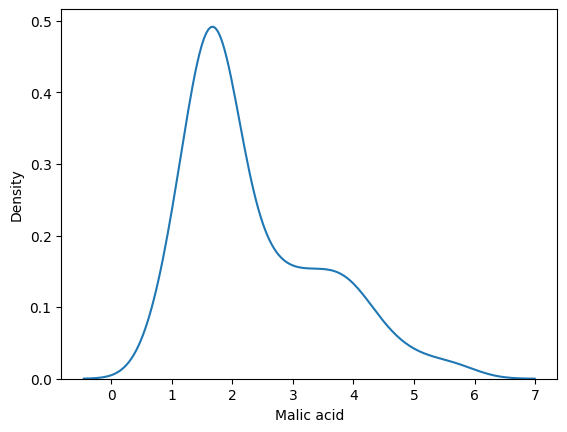

In [11]:
sns.kdeplot(df['Malic acid'])

<AxesSubplot: xlabel='Alcohol', ylabel='Malic acid'>

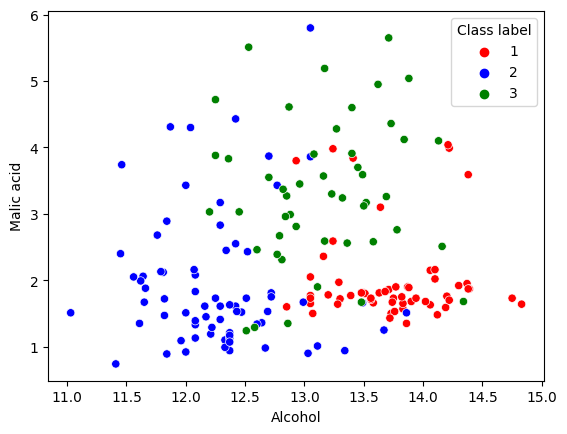

In [13]:
color_dict={1:'red' , 3:'green' , 2:'blue'}
sns.scatterplot(x=df['Alcohol'] , y=df['Malic acid'] , hue=df['Class label'] , palette=color_dict)

### Data Preprocessing

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.drop('Class label' , axis = 1),
                                                      df['Class label'],
                                                      test_size = 0.3,
                                                      random_state = 0)
x_train.shape , x_test.shape

((123, 2), (54, 2))

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
# the scaled data is a numpy array so we are again transforming it to a dataframe

x_train_scaled = pd.DataFrame(x_train_scaled , columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns= x_test.columns)

In [17]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,123.0,123.0
mean,13.0,2.3
std,0.8,1.2
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.8
75%,13.6,3.1
max,14.8,5.8


In [18]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,123.0,123.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


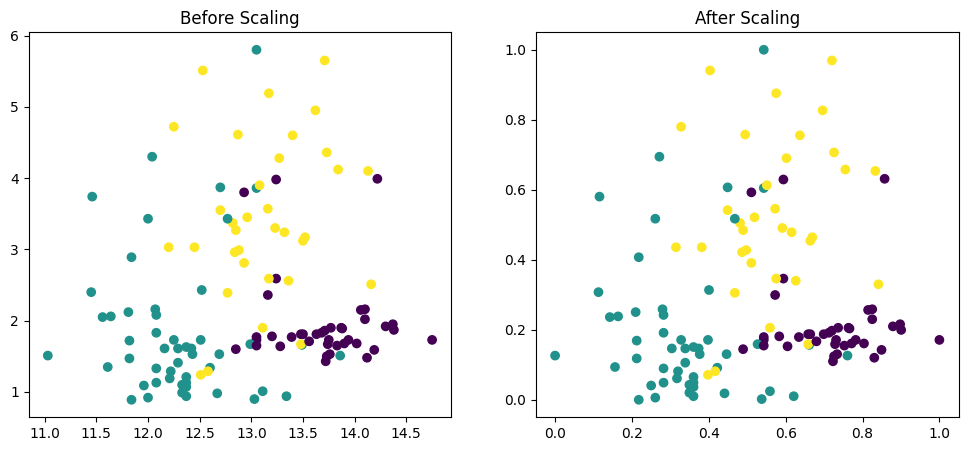

In [19]:
fig , (ax1,ax2) = plt.subplots(ncols = 2 , figsize = (12,5))
ax1.scatter(x_train['Alcohol'] , x_train['Malic acid'] ,c = y_train )
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Alcohol'] , x_train_scaled['Malic acid'] , c=y_train)
ax2.set_title('After Scaling')
plt.show()